# Imports

In [1]:
import mysql.connector
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Leitura de dados

In [2]:
def carrega_conexao():
    load_dotenv()
    env = os.environ

    # Connect to MySQL server
    localhost = env.get('MYSQL_HOST')
    user = env.get('MYSQL_USER')
    password = env.get('MYSQL_PASSWORD')

    conexao = mysql.connector.connect(user=user, password=password, host=localhost)
    return conexao

In [3]:
# Use a função carrega_conexao para obter a conexão
conexao_mysql = carrega_conexao()

# Converta a conexão MySQL para uma conexão SQLAlchemy
engine = create_engine('mysql+mysqlconnector://', creator=lambda: conexao_mysql)

# Substitua 'select * from fase4_petroleo.petroleo' pela sua consulta SQL
query = 'select * from fase4_petroleo.petroleo'

# Use a engine para ler os dados da tabela
df = pd.read_sql(query, con=engine)

# Não se esqueça de fechar a conexão quando terminar de usá-la
conexao_mysql.close()

In [4]:
df.set_index('data', inplace=True)
df

,preco
data,
2024-01-16,80.15
2024-01-15,79.76
2024-01-12,79.89
2024-01-11,80.21
2024-01-10,78.46
...,...
1987-05-26,18.63
1987-05-25,18.60
1987-05-22,18.55


In [5]:
#inverter a ordem do dataframe
df = df.iloc[::-1]

# Modelos

In [6]:
def plot_arima_sarima_predictions(df, train_data_size, forecast_steps, plot_data_size):
    # Sort the data by date in ascending order
    df = df.sort_index(ascending=True)

    # Filter data for training
    train_data = df[-train_data_size:-forecast_steps]

    # Train ARIMA(2,1,2)
    arima_model = ARIMA(train_data, order=(2, 1, 2))
    arima_model_trained = arima_model.fit()

    # Forecast ARIMA for the next week
    last_date = train_data.index[-1]
    arima_forecast = arima_model_trained.get_forecast(steps=forecast_steps)
    arima_pred_mean = arima_forecast.predicted_mean.rename('ARIMA(2,1,2) Predictions')
    arima_pred_mean.index = df[-forecast_steps:].index

    # Train SARIMA(2,1,2)(1,1,1,5) - Assuming weekly seasonality
    sarima_model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 5))
    sarima_model_trained = sarima_model.fit(disp=False)

    # Forecast SARIMA for the next week
    sarima_forecast = sarima_model_trained.get_forecast(steps=forecast_steps)
    sarima_pred_mean = sarima_forecast.predicted_mean.rename('SARIMA(2,1,2)(1,1,1,5) Predictions')
    sarima_pred_mean.index = df[-forecast_steps:].index

    # Plot both ARIMA and SARIMA predictions along with the original data for the last plot_data_size days
    plt.figure(figsize=(12, 6))
    plt.plot(df[-plot_data_size:], label=f'Last {train_data_size} Days Data', marker='o', linestyle='-', color='black')
    plt.plot(arima_pred_mean, label='ARIMA Predictions', linestyle='dashed', color='blue', marker='o')
    plt.plot(sarima_pred_mean, label='SARIMA Predictions', linestyle='dashed', color='green', marker='o')
    
    # # Set y-axis limits
    # plt.ylim(50, 100)
    
    # Set y-axis ticks with a step of 1
    plt.yticks(np.arange(50, 101, step=5))
    
    plt.legend()
    plt.title(f'ARIMA and SARIMA Predictions for the Last {train_data_size} Days')
    plt.show()

# Example usage:
# plot_arima_sarima_predictions(df, train_data_size=250*3, forecast_steps=5, plot_data_size=10)


## 3 anos prevendo 5 dias e mostrando 10 dias

c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No suppor

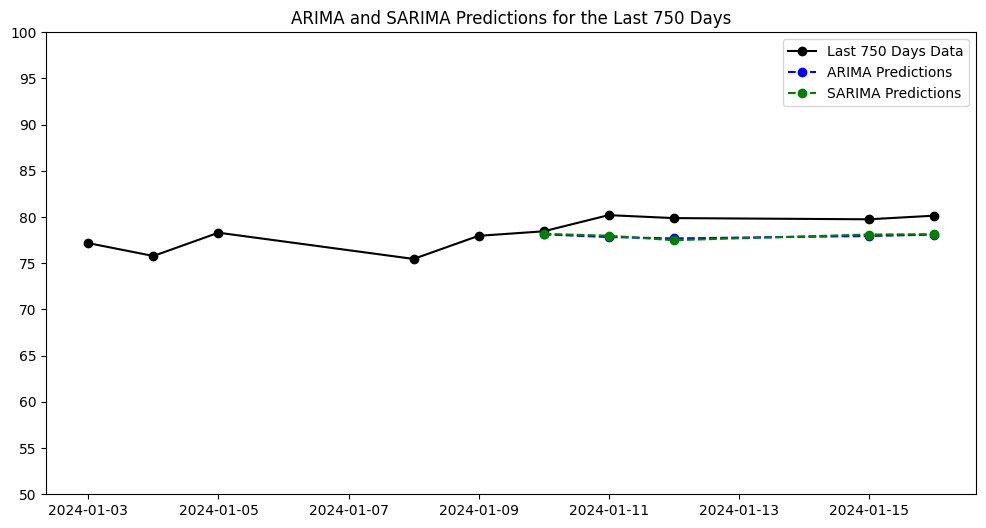

In [7]:
plot_arima_sarima_predictions(df, train_data_size=250*3, forecast_steps=5, plot_data_size=10)

## 30 dias, prevendo 5 dias e mostrando 10 dias

c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No suppor

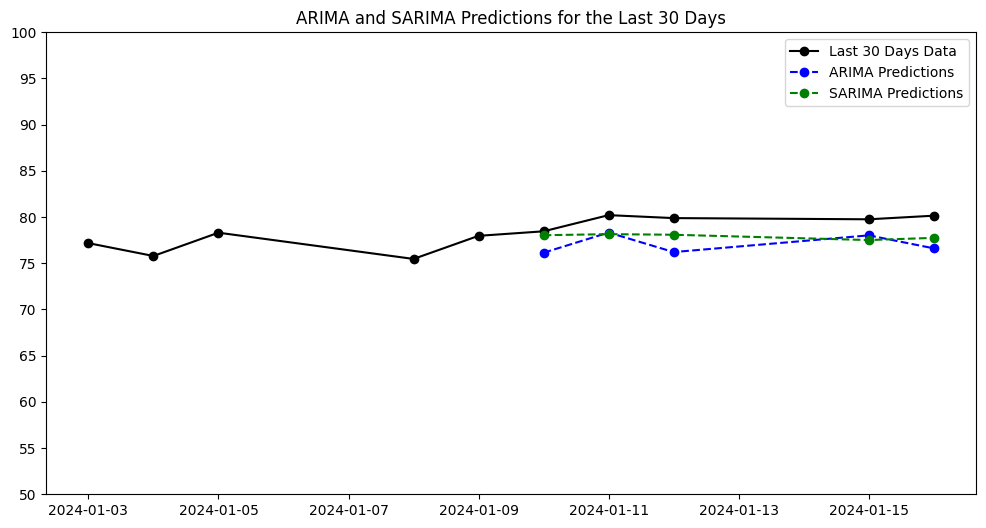

In [8]:
plot_arima_sarima_predictions(df, train_data_size=30, forecast_steps=5, plot_data_size=10)

## 10 dias, prevendo 5 dias, e montrando 10 dias

c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few obs

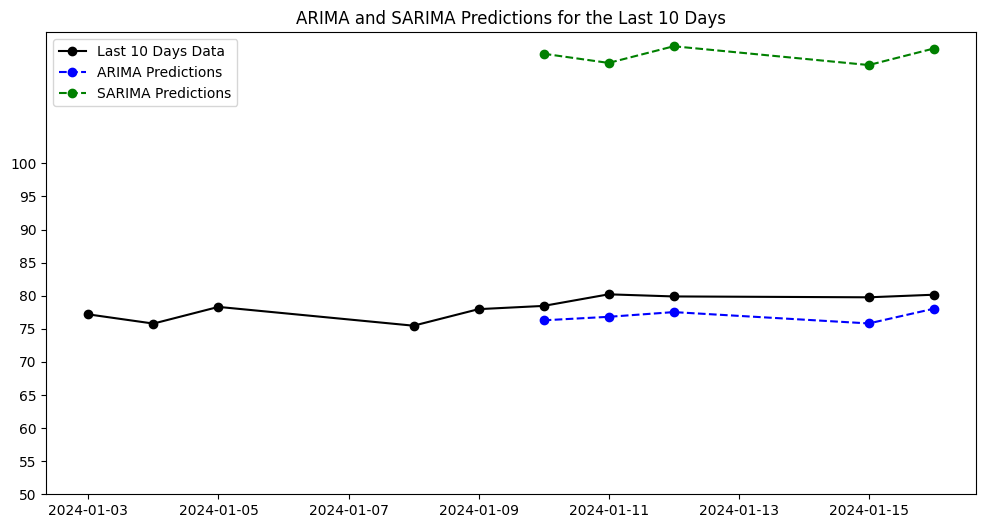

In [9]:
plot_arima_sarima_predictions(df, train_data_size=10, forecast_steps=5, plot_data_size=10)

c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No suppor

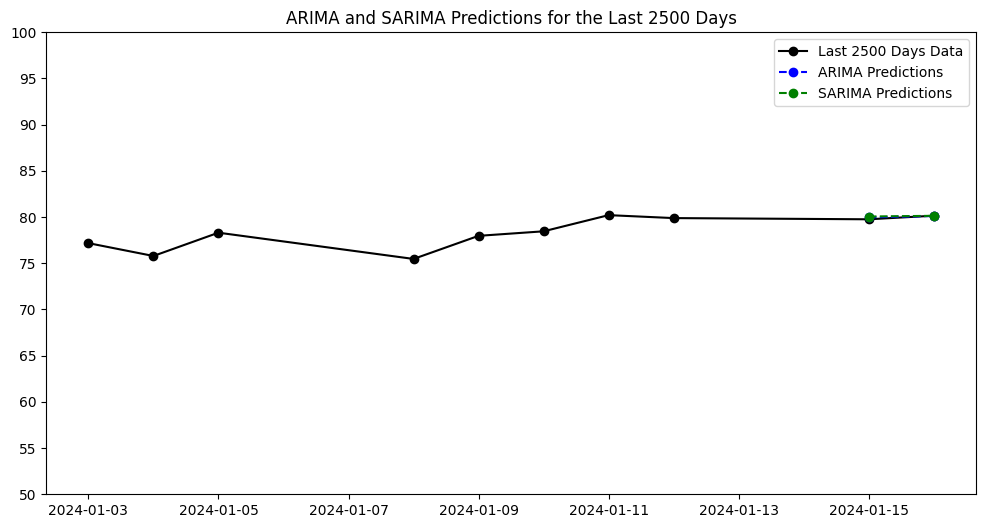

In [12]:
plot_arima_sarima_predictions(df, train_data_size=250*10, forecast_steps=2, plot_data_size=10)

c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase04\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No suppor

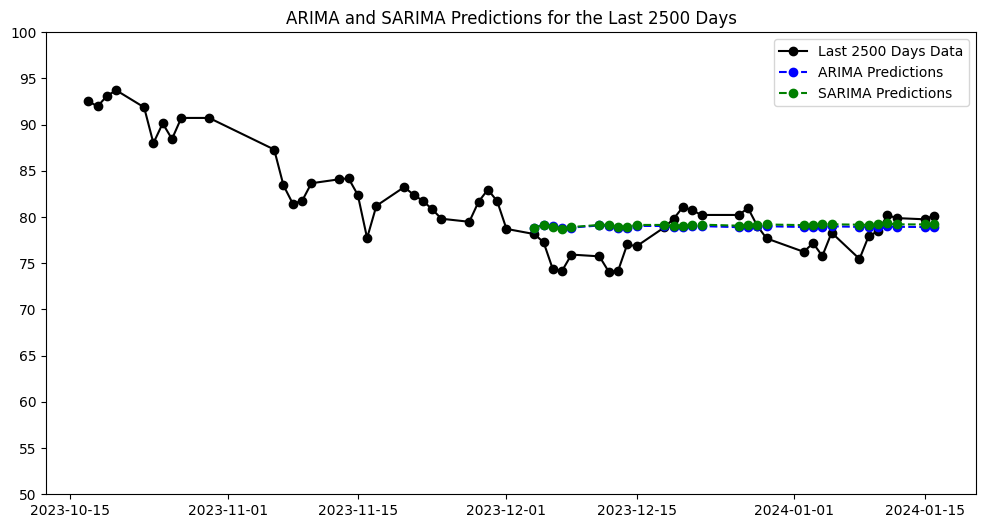

In [13]:
plot_arima_sarima_predictions(df, train_data_size=250*10, forecast_steps=30, plot_data_size=60)